In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


https://www.kaggle.com/datasets/uciml/glass
<br />В датасете присутсвует 10 признаков:
<ul>
<li>Rl - показатель преломления</li>
<li>Na - процент натрия в стекле</li>
<li>Mg - процент магния в стекле</li>
<li>Al - процент алюминия в стекле</li>
<li>Si - процент кремния в стекле</li>
<li>K - процент калия в стекле</li>
<li>Сa - процент кальция в стекле</li>
<li>Ba - процент бария в стекле</li>
<li>Fe - процент железа в стекле</li>
<li>(Целевая переменная) Type - тип стекла (значение от 1 до 7), однако типа 4 в датасете нет</li>
</ul>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Как мы можем заметить, все данные числовые и нет отсутсвующих данных, что облегчает работу предобработки данных

In [10]:
#разделим датасет на X и у
X = data.drop(["Type"], axis="columns")
y = data["Type"]

In [13]:
#разделим наши датасеты на тренировочную и тестирующие выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True)

In [18]:
%%timeit
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

1.16 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Модель обучается в среднем за 1.16 ms

In [19]:
print("Результат на обучающей выборке (accuracy) -", model_knn.score(X_train, y_train))

Результат на обучающей выборке (accuracy) - 0.7315436241610739


In [61]:
print("Результат на тестовой выборке (accuracy) -", model_knn.score(X_test, y_test))

y_pred = model_knn.predict(X_test)

print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Результат на тестовой выборке (accuracy) - 0.7076923076923077
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.80      0.70        25
           2       0.80      0.67      0.73        24
           3       0.33      0.14      0.20         7
           5       1.00      1.00      1.00         2
           6       0.50      1.00      0.67         1
           7       1.00      1.00      1.00         6

    accuracy                           0.71        65
   macro avg       0.71      0.77      0.72        65
weighted avg       0.70      0.71      0.69        65



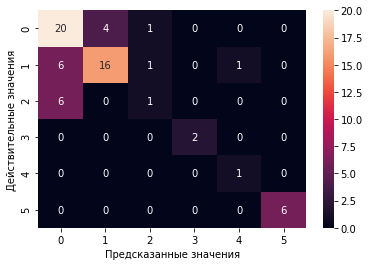

In [32]:
%matplotlib inline
 
class_names = [0, 1]
fig, ax = plt.subplots()
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

Теперь попробуем понизить размерность датасета

In [76]:
from sklearn.manifold import TSNE
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)
# Обучаем модель
transformed = model.fit_transform(X)
transformed_train, transformed_test, y_transformed_train, y_transformed_test = train_test_split(transformed, y, test_size = 0.30, shuffle=True)

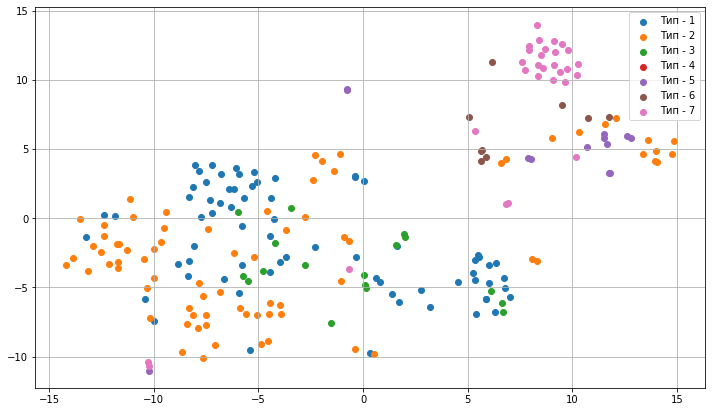

In [77]:
#для визуализации покажем их на графике
plt.figure(1, (12, 7))
for i in range(1, 8):
    plt.scatter(transformed[y == i][:, 0], transformed[y == i][:, 1], label=f'Тип - {i}')
plt.legend()
plt.grid()

In [79]:
%%timeit
model_knn_transformed = KNeighborsClassifier()
model_knn_transformed.fit(transformed_train, y_transformed_train)

437 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Скорость обучения увеличилась в 2-3 раза

In [80]:
print("Результат на обучающей выборке (accuracy) -", model_knn_transformed.score(transformed_train, y_transformed_train))

Результат на обучающей выборке (accuracy) - 0.7315436241610739


Точность на обучающей выборке осталась такой же

In [82]:
print("Результат на тестовой выборке (accuracy) -", model_knn_transformed.score(transformed_test, y_transformed_test))

y_pred = model_knn_transformed.predict(transformed_test)

print("Classification Report:")
print(metrics.classification_report(y_transformed_test, y_pred))

Результат на тестовой выборке (accuracy) - 0.7076923076923077
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.89      0.78        18
           2       0.65      0.71      0.68        24
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.50      0.67         4
           7       0.90      1.00      0.95         9

    accuracy                           0.71        65
   macro avg       0.65      0.57      0.59        65
weighted avg       0.68      0.71      0.68        65



На тестовой выборке результат такой же

Как результат можно сказать, что понижение размерности датасета дало значительный прирост в скорости обучения модели K-ближайших соседей (1.16 ms против 437 µs) почти в 3 раза
<br /> Точность же при этом осталась точно такая же
<br /> Из этого можно сделать вывод что применение методов обучения без учителя оправдано